<h1>Matplotlib - osa 2</h1>
<h2>Usean arvosarjan pylväskaavio</h2>

Tämä on jatkoa sarjan ensimmäiselle osalle https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb. Oletan ensimmäisen osan asioiden olevan lukijalle tuttuja.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Avaan datan ja näytän 5 ensimmäistä riviä
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# sukup- ja koulutus-muuttujien tekstimuotoiset arvot
sukup = ['Mies', 'Nainen']
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [4]:
# Lasken eri koulutuksen suorittaneiden lukumäärät sukupuolen mukaan
df1 = pd.crosstab(df['koulutus'], df['sukup'])
df1.index = koulutus
df1.columns = sukup
df1

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


<h2>Vaakapylväskaavio</h2>

Dataframen riveistä tulee luokka-akselin luokat/kategoriat (koulutus) ja sarakkeista arvosarjat (sukupuoli). Jos haluat vaihtaa luokka-akselin luokat ja arvojsarjat, niin transponoi dataframe <b>T</b>-toiminnolla: <b>ax1 = df1.T.plot.barh()</b>

Text(0.5, 0, 'Lukumäärä')

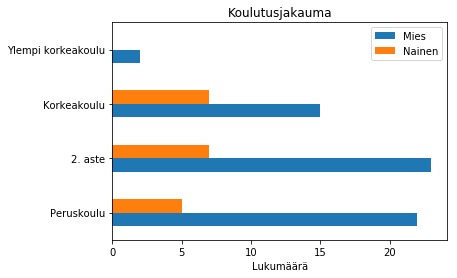

In [5]:
ax1 = df1.plot.barh()

ax1.set_title('Koulutusjakauma')
ax1.set_xlabel('Lukumäärä')

<h2>Hienosäätöä</h2>

Lisäparametri <b>width</b> muuttaa pylvään paksuutta ja samalla pylväiden välissä olevaa tyhjää tilaa. Arvo 0 häivyttää pylväät ja arvo 1 laittaa pylväät kiinni toisiinsa.

Lisäparametri <b>legend = 'reverse'</b> kääntää selitteen järjestyksen. Käännetty järjestys on tässä tapauksessa havainnollisempi.

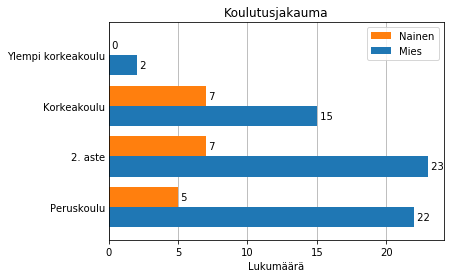

In [6]:
ax2 = df1.plot.barh(width = 0.8, legend = 'reverse')

ax2.set_title('Koulutusjakauma')
ax2.set_xlabel('Lukumäärä')

ax2.grid(axis = 'x')
ax2.set_axisbelow(True)
ax2.tick_params(axis = 'y', length = 0)

for bar in ax2.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f}'.format(x)
    ax2.text(x = x, y = y, s = ' ' + label, va = 'center')

<h2>Pystypylväskaavio</h2>

(0, 25)

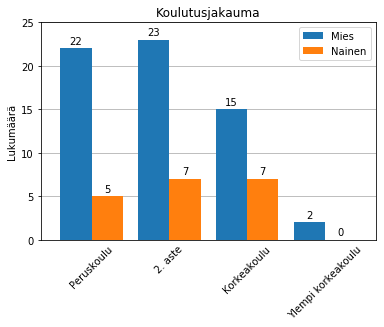

In [7]:
ax3 = df1.plot.bar(width = 0.8)

ax3.set_title('Koulutusjakauma')
ax3.set_ylabel('Lukumäärä')
ax3.set_xticklabels(labels = koulutus, rotation = 45)

ax3.grid(axis = 'y')
ax3.set_axisbelow(True)
ax3.tick_params(axis = 'x', length = 0)

for bar in ax3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f}'.format(y)
    ax3.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')
ax3.set_ylim(0, 25)

<h2>Pinottu (stacked) pylväskaavio</h2>

Pinottu pylväskaavio näyttää arvosarjat samassa pylväässä, jolloin kokonaismäärä on helposti nähtävissä pylvään kokonaispituutena.

Huomaa, miten pylvään mitat saa kätevästi yhdellä <b>get_bbox().bounds</b>-toiminnolla.

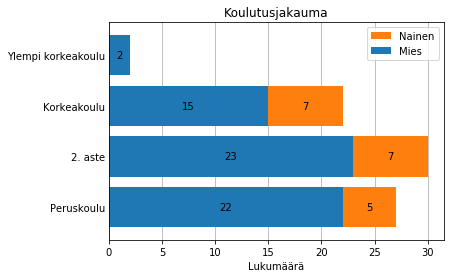

In [8]:
ax4 = df1.plot.barh(width = 0.8, legend = 'reverse', stacked = True)

ax4.set_title('Koulutusjakauma')
ax4.set_xlabel('Lukumäärä')

ax4.grid(axis = 'x')
ax4.set_axisbelow(True)
ax4.tick_params(axis = 'y', length = 0)

for bar in ax4.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width > 0:
        label = '{:.0f}'.format(width)
        ax4.text(x = left + width / 2, y = bottom + height / 2, s = label, ha = 'center', va = 'center')

<h2>Prosentit pinottuna (stacked) pylväskaaviona</h2>

Selite ei aina automaattisesti osu mieleiseen paikkaan. Seuraavassa tuunaan selitettä <b>legend()</b>-toiminnolla:
<ul>
    <li><b>ncol</b>-lisäparametrilla lisäsin selitteen sarakkeiden määräksi 4, jolloin sain koulutukset vierekkäin.</li>
    <li>Muutamien kokeilujen jälkeen päädyin sijoittamaan selitteen sijaintiin (-0.15, -0.2). Koordinaatiston (0, 0) on kaavion vasemmassa alakulmassa ja (1, 1) on kaavion oikeassa yläkulmassa.</li>
</ul>
Lue lisää <b>legend()</b>-tominnosta: 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

In [9]:
# Lasken prosenttitaulukon
df2 = pd.crosstab(df['sukup'], df['koulutus'], normalize = 'index') * 100
df2.index = sukup
df2.columns = koulutus
df2

,Peruskoulu,2. aste,Korkeakoulu,Ylempi korkeakoulu
Mies,35.483871,37.096774,24.193548,3.225806
Nainen,26.315789,36.842105,36.842105,0.000000


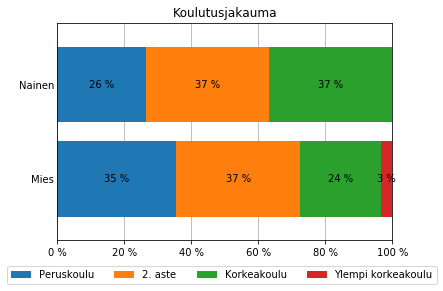

In [10]:
ax5 = df2.plot.barh(width = 0.8, stacked = True)

ax5.set_title('Koulutusjakauma')

ax5.grid(axis = 'x')
ax5.set_axisbelow(True)
ax5.tick_params(axis = 'y', length = 0)

ax5.set_xticklabels(['{:.0f} %'.format(x) for x in ax5.get_xticks()])
ax5.set_xlim(0, 100)

for bar in ax5.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width > 0:
        label = '{:.0f} %'.format(width)
        ax5.text(x = left + width / 2, y = bottom + height / 2, s = label, ha = 'center', va = 'center')
        
ax5.legend(loc = (-0.15, -0.2), ncol = 4)

<h2>Lisätietoa</h2>

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib3.ipynb käsittelee <b>histogrammia</b>.